In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ingeniería de atributos y modelos para ML

## Tarea N◦1: Selección de Atributos con Naïve Bayes

a) Disponer en colab el dataset Loan Data. identificar como clase el atributo ‘not.fully.paid’. Separar los datos en un conjunto de entrenamiento, reservando el 33 % para testing, usando random state=125.



In [ ]:
!kaggle datasets download itssuru/loan-data

Dataset URL: https://www.kaggle.com/datasets/itssuru/loan-data
License(s): DbCL-1.0
loan-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile

with ZipFile('loan-data.zip','r') as zip:
  zip.printdir()
  zip.extractall()

File Name                                             Modified             Size
loan_data.csv                                  2021-05-14 19:38:52       751253


In [ ]:
import pandas as pd
df=pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df_num=pd.get_dummies(df,columns=['purpose'])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_all_other           9578 

In [ ]:
df_num.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False


In [ ]:
df_num.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
#Balance de clase
print(df_num.shape)
ncl0=len(df_num[df_num['not.fully.paid']==0])
ncl1=len(df_num[df_num['not.fully.paid']==1])
print('Clase 0 (pagado)   =',ncl0,'porcentaje = %', (ncl0/(ncl0+ncl1)*100.))
print('Clase 1 (no pagado)=',ncl1,'porcentaje = %', (ncl1/(ncl0+ncl1)*100.))

(9578, 20)
Clase 0 (pagado)   = 8045 porcentaje = % 83.99457089162664
Clase 1 (no pagado)= 1533 porcentaje = % 16.005429108373356


In [ ]:
#Divido df_num en x e y

from sklearn.model_selection import train_test_split

x=df_num.drop('not.fully.paid',axis=1)
y=df_num['not.fully.paid']

In [ ]:
#Sepraro el conjuntos de entrenamiento y test
from  sklearn.model_selection import train_test_split

test_fraction=0.33

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_fraction, stratify=y,random_state=125)

print(len(x_train),len(x_test))


6417 3161


b) Implementar el clasificador Naive Bayes usando Scikit-learn. para predecir la clase y evaluar con las mismas metricas usadas en la guia 2. Atender en la documentacion de scikit-learn sobre f1_score a las opciones del parametro average. Utilizar en esta tarea la opcion weighted que tiene en cuenta el desbalance de clase. Para recall y precision usar pos label=1 dado que suponemos de interes a la clase minoritaria.


In [ ]:
from sklearn.naive_bayes import GaussianNB

model=GaussianNB()

#Entreno
model.fit(x_train,y_train)

#Predigo
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay
    )

In [ ]:
#Tengo que decirle a recall y precision cual es el valor que tomo como positivo
#El label de los positivos es la columna 0 (columna maligna)
accuracy=accuracy_score(y_test,y_pred)
rec=recall_score(y_test,y_pred,pos_label=1)
prec=precision_score(y_test,y_pred,pos_label=1)
f1=f1_score(y_test,y_pred,average='weighted')
#f1 weighted, calcula f1 para la clase positiva y negativa, y luego las promedio pesado, teniendo en cuenta el support(numero de ejemplos que tiene cada valor de clase)

print("Accuracy:", accuracy)
print("Recall:", rec)
print("Precision:", prec)
print("F1 score:", f1 )

Accuracy: 0.8187282505536223
Recall: 0.07905138339920949
Precision: 0.272108843537415
F1 score: 0.7746390251749721


In [ ]:
print(classification_report(y_test,y_pred,digits=4))
#macro es el mismo promedio de f1 pero no pesado

              precision    recall  f1-score   support

           0     0.8454    0.9597    0.8989      2655
           1     0.2721    0.0791    0.1225       506

    accuracy                         0.8187      3161
   macro avg     0.5587    0.5194    0.5107      3161
weighted avg     0.7536    0.8187    0.7746      3161



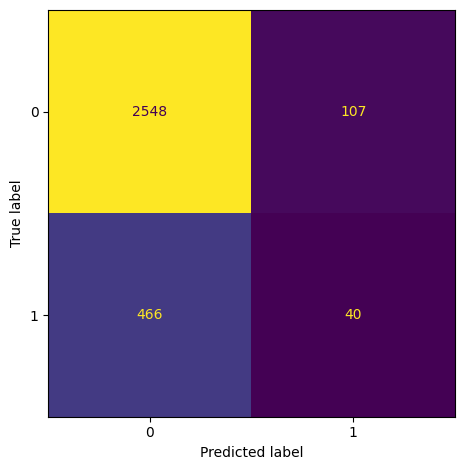

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=[0,1], colorbar=False
    )
plt.tight_layout() #opcional
plt.show()

In [ ]:
accuracy0=accuracy_score(y_test,y_pred)
rec0=recall_score(y_test,y_pred,pos_label=1)
prec0=precision_score(y_test,y_pred,pos_label=1)
f10=f1_score(y_test,y_pred,average='weighted')


In [ ]:
print("accuracy", "recall", 'precision',"f1 score:" )
print(accuracy0, rec0, prec0, f10)


accuracy recall precision f1 score:
0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721




---


c) A continuacion se desea averiguar cuales son los atributos relevantes en la clasificacion de este problema y entender como la eliminacion de algunos de ellos incide en las metricas de evaluacion usadas.


Elimino uno a uno los distintos atributos y al final analizo como cambian las funciones accuracy, recall, precision y f1 score

In [ ]:
x1=x.drop('credit.policy',axis=1)
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x1_train,y_train)
y1_pred=model.predict(x1_test)

accuracy1=accuracy_score(y1_test,y1_pred)
rec1=recall_score(y1_test,y1_pred,pos_label=1)
prec1=precision_score(y1_test,y1_pred,pos_label=1)
f11=f1_score(y1_test,y1_pred,average='weighted')

In [ ]:
x2=x.drop('int.rate',axis=1)
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y,test_size=test_fraction, stratify=y, random_state=125)

#Entreno y predigo
model.fit(x2_train,y2_train)
y2_pred=model.predict(x2_test)

accuracy2=accuracy_score(y2_test,y2_pred)
rec2=recall_score(y2_test,y2_pred,pos_label=1)
prec2=precision_score(y2_test,y2_pred,pos_label=1)
f12=f1_score(y2_test,y2_pred,average='weighted')


In [ ]:
x3=x.drop('installment',axis=1)
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x3_train,y3_train)
y3_pred=model.predict(x3_test)


accuracy3=accuracy_score(y3_test,y3_pred)
rec3=recall_score(y3_test,y3_pred,pos_label=1)
prec3=precision_score(y3_test,y3_pred,pos_label=1)
f13=f1_score(y3_test,y3_pred,average='weighted')


In [ ]:
x4=x.drop('log.annual.inc',axis=1)
x4_train,x4_test,y4_train,y4_test=train_test_split(x4,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x4_train,y4_train)
y4_pred=model.predict(x4_test)

accuracy4=accuracy_score(y4_test,y4_pred)
rec4=recall_score(y4_test,y4_pred,pos_label=1)
prec4=precision_score(y4_test,y4_pred,pos_label=1)
f14=f1_score(y4_test,y4_pred,average='weighted')


In [ ]:
x5=x.drop('dti',axis=1)
x5_train,x5_test,y5_train,y5_test=train_test_split(x5,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x5_train,y5_train)
y5_pred=model.predict(x5_test)


accuracy5=accuracy_score(y5_test,y5_pred)
rec5=recall_score(y5_test,y5_pred,pos_label=1)
prec5=precision_score(y5_test,y5_pred,pos_label=1)
f15=f1_score(y5_test,y5_pred,average='weighted')


In [ ]:
x6=x.drop('fico',axis=1)
x6_train,x6_test,y6_train,y6_test=train_test_split(x6,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x6_train,y6_train)
y6_pred=model.predict(x6_test)

accuracy6=accuracy_score(y6_test,y6_pred)
rec6=recall_score(y6_test,y6_pred,pos_label=1)
prec6=precision_score(y6_test,y6_pred,pos_label=1)
f16=f1_score(y6_test,y6_pred,average='weighted')

In [ ]:
x7=x.drop('days.with.cr.line',axis=1)
x7_train,x7_test,y7_train,y7_test=train_test_split(x7,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x7_train,y7_train)
y7_pred=model.predict(x7_test)

accuracy7=accuracy_score(y7_test,y7_pred)
rec7=recall_score(y7_test,y7_pred,pos_label=1)
prec7=precision_score(y7_test,y7_pred,pos_label=1)
f17=f1_score(y7_test,y7_pred,average='weighted')


In [ ]:
x8=x.drop('revol.bal',axis=1)
x8_train,x8_test,y8_train,y8_test=train_test_split(x8,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x8_train,y8_train)
y8_pred=model.predict(x8_test)

accuracy8=accuracy_score(y8_test,y8_pred)
rec8=recall_score(y8_test,y8_pred,pos_label=1)
prec8=precision_score(y8_test,y8_pred,pos_label=1)
f18=f1_score(y8_test,y8_pred,average='weighted')


In [ ]:
x9=x.drop('revol.util',axis=1)
x9_train,x9_test,y9_train,y9_test=train_test_split(x9,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x9_train,y9_train)
y9_pred=model.predict(x9_test)

accuracy9=accuracy_score(y9_test,y9_pred)
rec9=recall_score(y9_test,y9_pred,pos_label=1)
prec9=precision_score(y9_test,y9_pred,pos_label=1)
f19=f1_score(y9_test,y9_pred,average='weighted')


In [ ]:
x10=x.drop('inq.last.6mths',axis=1)
x10_train,x10_test,y10_train,y10_test=train_test_split(x10,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x10_train,y10_train)
y10_pred=model.predict(x10_test)

accuracy10=accuracy_score(y10_test,y10_pred)
rec10=recall_score(y10_test,y10_pred,pos_label=1)
prec10=precision_score(y10_test,y10_pred,pos_label=1)
f110=f1_score(y10_test,y10_pred,average='weighted')


In [ ]:
x11=x.drop('delinq.2yrs',axis=1)
x11_train,x11_test,y11_train,y11_test=train_test_split(x11,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x11_train,y11_train)
y11_pred=model.predict(x11_test)

accuracy11=accuracy_score(y11_test,y11_pred)
rec11=recall_score(y11_test,y11_pred,pos_label=1)
prec11=precision_score(y11_test,y11_pred,pos_label=1)
f111=f1_score(y11_test,y11_pred,average='weighted')


In [ ]:
x12=x.drop('pub.rec',axis=1)
x12_train,x12_test,y12_train,y12_test=train_test_split(x12,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x12_train,y12_train)
y12_pred=model.predict(x12_test)

accuracy12=accuracy_score(y12_test,y12_pred)
rec12=recall_score(y12_test,y12_pred,pos_label=1)
prec12=precision_score(y12_test,y12_pred,pos_label=1)
f112=f1_score(y12_test,y12_pred,average='weighted')


Elimino todas las columnas de purpose a la vez

In [ ]:
x13=x.drop('purpose_all_other',axis=1)
x13=x13.drop('purpose_credit_card',axis=1)
x13=x13.drop('purpose_debt_consolidation',axis=1)
x13=x13.drop('purpose_educational',axis=1)
x13=x13.drop('purpose_home_improvement',axis=1)
x13=x13.drop('purpose_major_purchase',axis=1)
x13=x13.drop('purpose_small_business',axis=1)

x13_train,x13_test,y13_train,y13_test=train_test_split(x13,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x13_train,y13_train)
y13_pred=model.predict(x13_test)

accuracy13=accuracy_score(y13_test,y13_pred)
rec13=recall_score(y13_test,y13_pred,pos_label=1)
prec13=precision_score(y13_test,y13_pred,pos_label=1)
f113=f1_score(y13_test,y13_pred,average='weighted')


In [ ]:
res=pd.DataFrame({
    "col.eliminated": ["none","credit.policy","int.rate","installment","log.annual.inc","dti","fico","days.with.cr.line","revol.bal","revol.util","inq.last.6mths","delinq.2yrs","pub.rec","purpose"],
    "accuracy": [accuracy0,accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7,accuracy8,accuracy9,accuracy10,accuracy11,accuracy12,accuracy13],
    "recall": [rec0,rec1,rec2,rec3,rec4,rec5,rec6,rec7,rec8,rec9,rec10,rec11,rec12,rec13],
    "precision": [prec0,prec1,prec2,prec3,prec4,prec5,prec6,prec7,prec8,prec9,prec10,prec11,prec12,prec13],
    "f1_score": [f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f110,f111,f112,f113]
})

res

,col.eliminated,accuracy,recall,precision,f1_score
0,none,0.818728,0.079051,0.272109,0.774639
1,credit.policy,0.819677,0.079051,0.277778,0.775219
2,int.rate,0.818728,0.079051,0.272109,0.774639
3,installment,0.820626,0.079051,0.283688,0.775799
4,log.annual.inc,0.818728,0.081028,0.275168,0.775038
5,dti,0.820626,0.081028,0.286713,0.776201
6,fico,0.820943,0.075099,0.279412,0.775177
7,days.with.cr.line,0.819361,0.083004,0.281879,0.775823
8,revol.bal,0.775071,0.330040,0.309833,0.777919
9,revol.util,0.819677,0.077075,0.274648,0.774815


Concetrando el estudio en el recall de la clase 1, de la tabla observo que:

*   Eliminar 'revol.bal'(index=8) produce el mayor aumento de recall, incrementa 0.25.
Eso me dice que es una variable importante.

*   Noto que eliminar ciertos atributos no modifica mucho comparado con none, estos son buenos candidatos a tener en cuenta a la hora de ir eliminando atributos y quedarse con la menor cantidad (pensando que aportrian poca información). Algunos de estos que modifican poco recall son: credit.policy, int.rate, installment, deliq.2yrs, pub.rec, purpose

*   Eliminando 'inq.last.6mths' reduce recall a la mitad, a simple vista es un buen atributo a tener en cuenta.

*   Eliminar 'days.with.cr.line' mejora recall, tambien lo mejoran en menor medida eliminar 'log.annual.inc' y 'dti'.

*   Mejora accuracy al eliminar 'installment' y 'inq.last.6mts'

*   f1 score es muy parecido para todos.








---



d) Usando la informacion del dataframe generado y experimentos de prueba y error, determinar cual es el conjunto mas pequenos de atributos necesarios para clasificar manteniendo (casi) invariante f1-score pero mejorando recall de la clase de interes (1) por lo menos a 0.25. Declarar cuales son esas variables, reportar las m ́etricas que se consiguen usando s ́olo estos atributos y mostrar la matriz de confusi ́on resultante.


Voy probando que atributos eliminar de forma de seguir obteniendo un buen recall y que las demas funciones se mantengan.

El primer atributo que elimino es 'revol.bal', el que al ser eliminado aumenta en mayor medida recall.
El siguiente atributo que elimino es 'days.with.cr.line' que tambien mejora recall

In [ ]:
x14=x.drop('revol.bal',axis=1)
x14=x14.drop('days.with.cr.line',axis=1)

x14_train,x14_test,y14_train,y14_test=train_test_split(x14,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x14_train,y14_train)
y14_pred=model.predict(x14_test)


accuracy14=accuracy_score(y14_test,y14_pred)
rec14=recall_score(y14_test,y14_pred,pos_label=1)
prec14=precision_score(y14_test,y14_pred,pos_label=1)
f114=f1_score(y14_test,y14_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('revol.bal        ',accuracy8, rec8, prec8, f18)
print('esta prueba      ',accuracy14, rec14, prec14, f114)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
esta prueba       0.7611515343245808 0.3616600790513834 0.2975609756097561 0.7702608689268414


Es un buen atributo a eliminar, aumenta recall en 0.6 y disminuye 0.01 los otros.

Continuo con los otros dos atributos que aumentan un poco recall:  'log.annual.inc' y 'dti'.

In [ ]:
x15=x14.drop('log.annual.inc',axis=1)

x15_train,x15_test,y15_train,y15_test=train_test_split(x15,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x15_train,y15_train)
y15_pred=model.predict(x15_test)


accuracy15=accuracy_score(y15_test,y15_pred)
rec15=recall_score(y15_test,y15_pred,pos_label=1)
prec15=precision_score(y15_test,y15_pred,pos_label=1)
f115=f1_score(y15_test,y15_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('prueba anterior  ',accuracy14, rec14, prec14, f114)
print('esta prueba      ',accuracy15, rec15, prec15, f115)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
prueba anterior   0.7611515343245808 0.3616600790513834 0.2975609756097561 0.7702608689268414
esta prueba       0.7617842454919329 0.36561264822134387 0.29983792544570503 0.7710141682189227


Aumenta apenas recall (0.004) y mantiene el resto de forma similar, aumentando precision en 0.002. Elimino tambien este atributo.

El siguiente en la lista es 'dti'

In [ ]:
x16=x15.drop('dti',axis=1)

x16_train,x16_test,y16_train,y16_test=train_test_split(x16,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x16_train,y16_train)
y16_pred=model.predict(x16_test)


accuracy16=accuracy_score(y16_test,y16_pred)
rec16=recall_score(y16_test,y16_pred,pos_label=1)
prec16=precision_score(y16_test,y16_pred,pos_label=1)
f116=f1_score(y16_test,y16_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('prueba anterior  ',accuracy14, rec14, prec14, f114)
print('esta prueba      ',accuracy16, rec16, prec16, f116)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
prueba anterior   0.7611515343245808 0.3616600790513834 0.2975609756097561 0.7702608689268414
esta prueba       0.7595697564062006 0.3577075098814229 0.29383116883116883 0.7688125404689412


Hasta ahora los atributos eliminados son: 'revol.bal' 'revol.bal', 'days.with.cr.line', 'log.annual.inc', 'dti'

Ahora sigo probando con los que originalmente modifican poco el recall: credit.policy, int.rate, installment, deliq.2yrs, pub.rec, purpose

In [ ]:
# Uso x15, tiene eliminado 'revol.bal',
x17=x16.drop('credit.policy',axis=1)

x17_train,x17_test,y17_train,y17_test=train_test_split(x17,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x17_train,y17_train)
y17_pred=model.predict(x17_test)

accuracy17=accuracy_score(y17_test,y17_pred)
rec17=recall_score(y17_test,y17_pred,pos_label=1)
prec17=precision_score(y17_test,y17_pred,pos_label=1)
f117=f1_score(y17_test,y17_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('prueba anterior  ',accuracy16, rec16, prec16, f116)
print('esta prueba      ',accuracy17, rec17, prec17, f117)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
prueba anterior   0.7595697564062006 0.3577075098814229 0.29383116883116883 0.7688125404689412
esta prueba       0.768111357165454 0.2826086956521739 0.2787524366471735 0.7687547869700624


Empeora recall y lo que gano de las otras no compensa, dejo credit.policy

Hasta ahora los atributos eliminados son: 'revol.bal' 'revol.bal', 'days.with.cr.line', 'log.annual.inc', 'dti'.

Los atributos conservados son: credit.policy

Sigo probando con los que originalmente modifican poco el recall: credit.policy(x), int.rate, installment, deliq.2yrs, pub.rec, purpose



---



In [ ]:
# Elimino 'revol.bal','days.with.cr.line','log.annual.inc','dti'. . No elimino 'credit.policy''
x17=x16.drop('int.rate',axis=1)

x17_train,x17_test,y17_train,y17_test=train_test_split(x17,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x17_train,y17_train)
y17_pred=model.predict(x17_test)

accuracy17=accuracy_score(y17_test,y17_pred)
rec17=recall_score(y17_test,y17_pred,pos_label=1)
prec17=precision_score(y17_test,y17_pred,pos_label=1)
f117=f1_score(y17_test,y17_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('prueba anterior  ',accuracy16, rec16, prec16, f116)
print('esta prueba      ',accuracy17, rec17, prec17, f117)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
prueba anterior   0.7595697564062006 0.3577075098814229 0.29383116883116883 0.7688125404689412
esta prueba       0.7630496678266372 0.32806324110671936 0.288695652173913 0.7690521363857549


In [ ]:
# Elimino 'revol.bal','days.with.cr.line','log.annual.inc','dti'. . No elimino 'credit.policy''
x17=x16.drop('installment',axis=1)

x17_train,x17_test,y17_train,y17_test=train_test_split(x17,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x17_train,y17_train)
y17_pred=model.predict(x17_test)

accuracy17=accuracy_score(y17_test,y17_pred)
rec17=recall_score(y17_test,y17_pred,pos_label=1)
prec17=precision_score(y17_test,y17_pred,pos_label=1)
f117=f1_score(y17_test,y17_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('prueba anterior  ',accuracy16, rec16, prec16, f116)
print('esta prueba      ',accuracy17, rec17, prec17, f117)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
prueba anterior   0.7595697564062006 0.3577075098814229 0.29383116883116883 0.7688125404689412
esta prueba       0.7573552673204682 0.36363636363636365 0.29252782193958665 0.7676260445845832


In [ ]:
# Elimino 'revol.bal','days.with.cr.line','log.annual.inc','dti'. . No elimino 'credit.policy''
x17=x16.drop('delinq.2yrs',axis=1)

x17_train,x17_test,y17_train,y17_test=train_test_split(x17,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x17_train,y17_train)
y17_pred=model.predict(x17_test)

accuracy17=accuracy_score(y17_test,y17_pred)
rec17=recall_score(y17_test,y17_pred,pos_label=1)
prec17=precision_score(y17_test,y17_pred,pos_label=1)
f117=f1_score(y17_test,y17_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('prueba anterior  ',accuracy16, rec16, prec16, f116)
print('esta prueba      ',accuracy17, rec17, prec17, f117)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
prueba anterior   0.7595697564062006 0.3577075098814229 0.29383116883116883 0.7688125404689412
esta prueba       0.7602024675735527 0.3577075098814229 0.2947882736156352 0.7692748865740909


In [ ]:
# Elimino 'revol.bal','days.with.cr.line','log.annual.inc','dti'. . No elimino 'credit.policy''
x17=x16.drop('pub.rec',axis=1)

x17_train,x17_test,y17_train,y17_test=train_test_split(x17,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x17_train,y17_train)
y17_pred=model.predict(x17_test)

accuracy17=accuracy_score(y17_test,y17_pred)
rec17=recall_score(y17_test,y17_pred,pos_label=1)
prec17=precision_score(y17_test,y17_pred,pos_label=1)
f117=f1_score(y17_test,y17_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('prueba anterior  ',accuracy16, rec16, prec16, f116)
print('esta prueba      ',accuracy17, rec17, prec17, f117)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
prueba anterior   0.7595697564062006 0.3577075098814229 0.29383116883116883 0.7688125404689412
esta prueba       0.7658968680797216 0.3616600790513834 0.305 0.7737357512894449


Eliminar int.rate, installment, delinq.2yrs, pub.rec no modifica mucho. Voy probando eliminar estos. Antes veo purpose

In [ ]:
x17=x16.drop('purpose_all_other',axis=1)
x17=x17.drop('purpose_credit_card',axis=1)
x17=x17.drop('purpose_debt_consolidation',axis=1)
x17=x17.drop('purpose_educational',axis=1)
x17=x17.drop('purpose_home_improvement',axis=1)
x17=x17.drop('purpose_major_purchase',axis=1)
x17=x17.drop('purpose_small_business',axis=1)

x17_train,x17_test,y17_train,y17_test=train_test_split(x17,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x17_train,y17_train)
y17_pred=model.predict(x17_test)

accuracy17=accuracy_score(y17_test,y17_pred)
rec17=recall_score(y17_test,y17_pred,pos_label=1)
prec17=precision_score(y17_test,y17_pred,pos_label=1)
f117=f1_score(y17_test,y17_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('prueba anterior  ',accuracy16, rec16, prec16, f116)
print('esta prueba      ',accuracy17, rec17, prec17, f117)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
prueba anterior   0.7595697564062006 0.3577075098814229 0.29383116883116883 0.7688125404689412
esta prueba       0.7832964251819045 0.24703557312252963 0.2913752913752914 0.7759220814943438


Eliminar purpose disminuye mucho (0.1) recall, me voy a quedar con este atributo

Eliminar int.rate, installment, delinq.2yrs, pub.rec no modifica mucho. Voy probando eliminar estos

In [ ]:
# Elimino 'revol.bal','days.with.cr.line','log.annual.inc','dti'. . No elimino 'credit.policy''
x18=x16.drop('int.rate',axis=1)
x18_train,x18_test,y18_train,y18_test=train_test_split(x18,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x18_train,y18_train)
y18_pred=model.predict(x18_test)


accuracy18=accuracy_score(y18_test,y18_pred)
rec18=recall_score(y18_test,y18_pred,pos_label=1)
prec18=precision_score(y18_test,y18_pred,pos_label=1)
f118=f1_score(y18_test,y18_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('prueba anterior  ',accuracy16, rec16, prec16, f116)
print('esta prueba      ',accuracy18, rec18, prec18, f118)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
prueba anterior   0.7595697564062006 0.3577075098814229 0.29383116883116883 0.7688125404689412
esta prueba       0.7630496678266372 0.32806324110671936 0.288695652173913 0.7690521363857549


Disminuye en menor medida (0.03)

In [ ]:
# Elimino 'revol.bal','days.with.cr.line','log.annual.inc','dti'. . No elimino 'credit.policy''
x18=x16.drop('int.rate',axis=1)
x18=x16.drop('installment',axis=1)
x18=x16.drop('delinq.2yrs',axis=1)
x18=x16.drop('pub.rec',axis=1)
x18_train,x18_test,y18_train,y18_test=train_test_split(x18,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x18_train,y18_train)
y18_pred=model.predict(x18_test)


accuracy18=accuracy_score(y18_test,y18_pred)
rec18=recall_score(y18_test,y18_pred,pos_label=1)
prec18=precision_score(y18_test,y18_pred,pos_label=1)
f118=f1_score(y18_test,y18_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('prueba anterior  ',accuracy16, rec16, prec16, f116)
print('esta prueba      ',accuracy18, rec18, prec18, f118)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
prueba anterior   0.7595697564062006 0.3577075098814229 0.29383116883116883 0.7688125404689412
esta prueba       0.7658968680797216 0.3616600790513834 0.305 0.7737357512894449


Mejora en general, sigo con esta version.

Elimino 'revol.bal', 'days.with.cr.line', 'log.annual.inc', 'dti', 'int.rate', 'installment', 'delinq.2yrs', 'pub.rec'

No elimino 'credit.policy' y 'purpose'

Ahora voy probando con los atributos que me quedan: 'fico', 'revol.util' y 'inq.last.6mths'.


Siguen algunas pruebas:




In [ ]:
x19=x18.drop('fico',axis=1)
x19_train,x19_test,y19_train,y19_test=train_test_split(x19,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x19_train,y19_train)
y19_pred=model.predict(x19_test)

accuracy19=accuracy_score(y19_test,y19_pred)
rec19=recall_score(y19_test,y19_pred,pos_label=1)
prec19=precision_score(y19_test,y19_pred,pos_label=1)
f119=f1_score(y19_test,y19_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('prueba anterior  ',accuracy18, rec18, prec18, f118)
print('esta prueba      ',accuracy19, rec19, prec19, f119)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
prueba anterior   0.7658968680797216 0.3616600790513834 0.305 0.7737357512894449
esta prueba       0.7712749130022145 0.3359683794466403 0.3052064631956912 0.7756526838618257


In [ ]:
x19=x18.drop('revol.util',axis=1)
x19_train,x19_test,y19_train,y19_test=train_test_split(x19,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x19_train,y19_train)
y19_pred=model.predict(x19_test)

accuracy19=accuracy_score(y19_test,y19_pred)
rec19=recall_score(y19_test,y19_pred,pos_label=1)
prec19=precision_score(y19_test,y19_pred,pos_label=1)
f119=f1_score(y19_test,y19_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('prueba anterior  ',accuracy18, rec18, prec18, f118)
print('esta prueba      ',accuracy19, rec19, prec19, f119)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
prueba anterior   0.7658968680797216 0.3616600790513834 0.305 0.7737357512894449
esta prueba       0.7671622904144259 0.34980237154150196 0.3030821917808219 0.7737575787478704


In [ ]:
x19=x18.drop('inq.last.6mths',axis=1)
x19_train,x19_test,y19_train,y19_test=train_test_split(x19,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x19_train,y19_train)
y19_pred=model.predict(x19_test)

accuracy19=accuracy_score(y19_test,y19_pred)
rec19=recall_score(y19_test,y19_pred,pos_label=1)
prec19=precision_score(y19_test,y19_pred,pos_label=1)
f119=f1_score(y19_test,y19_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('prueba anterior  ',accuracy18, rec18, prec18, f118)
print('esta prueba      ',accuracy19, rec19, prec19, f119)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
prueba anterior   0.7658968680797216 0.3616600790513834 0.305 0.7737357512894449
esta prueba       0.7586206896551724 0.33794466403162055 0.2854757929883139 0.7666268260804535


Estos tres no modifican mucho, pruebo combinaciones de estos ultimos

In [ ]:
x19=x18.drop('revol.util',axis=1)
x19=x19.drop('inq.last.6mths',axis=1)
#x19=x19.drop('fico',axis=1)
x19_train,x19_test,y19_train,y19_test=train_test_split(x19,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x19_train,y19_train)
y19_pred=model.predict(x19_test)

accuracy19=accuracy_score(y19_test,y19_pred)
rec19=recall_score(y19_test,y19_pred,pos_label=1)
prec19=precision_score(y19_test,y19_pred,pos_label=1)
f119=f1_score(y19_test,y19_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('prueba anterior  ',accuracy18, rec18, prec18, f118)
print('esta prueba      ',accuracy19, rec19, prec19, f119)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
revol.bal         0.7750711800063271 0.3300395256916996 0.3098330241187384 0.7779193855244542
prueba anterior   0.7658968680797216 0.3616600790513834 0.305 0.7737357512894449
esta prueba       0.7608351787409048 0.3438735177865613 0.2909698996655518 0.768691989098161


El atributo 'fico' modifica mucho.

Si me quedo solo con 'credit.policy', 'purpose' y 'fico' obtengo un buen recall --> 0.34

In [ ]:
#En este paso me estoy asegurando de que me quede solo con  'credit.policy', 'purpose' y 'fico'
x20=x.drop('int.rate',axis=1)
x20=x20.drop('installment',axis=1)
x20=x20.drop('log.annual.inc',axis=1)
x20=x20.drop('dti',axis=1)
x20=x20.drop('days.with.cr.line',axis=1)
x20=x20.drop('revol.bal',axis=1)
x20=x20.drop('revol.util',axis=1)
x20=x20.drop('inq.last.6mths',axis=1)
x20=x20.drop('delinq.2yrs',axis=1)
x20=x20.drop('pub.rec',axis=1)

x20_train,x20_test,y20_train,y20_test=train_test_split(x20,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x20_train,y20_train)
y20_pred=model.predict(x20_test)

accuracy20=accuracy_score(y20_test,y20_pred)
rec20=recall_score(y20_test,y20_pred,pos_label=1)
prec20=precision_score(y20_test,y20_pred,pos_label=1)
f120=f1_score(y20_test,y20_pred,average='weighted')

print('col.eliminated   ','accuracy   ', 'recall', 'precision','f1 score' )
print('esta prueba      ',accuracy20, rec20, prec20, f120)

col.eliminated    accuracy    recall precision f1 score
esta prueba       0.7649478013286934 0.34782608695652173 0.298811544991511 0.7719899648969867


              precision    recall  f1-score   support

           0     0.8717    0.8444    0.8579      2655
           1     0.2988    0.3478    0.3215       506

    accuracy                         0.7649      3161
   macro avg     0.5853    0.5961    0.5897      3161
weighted avg     0.7800    0.7649    0.7720      3161



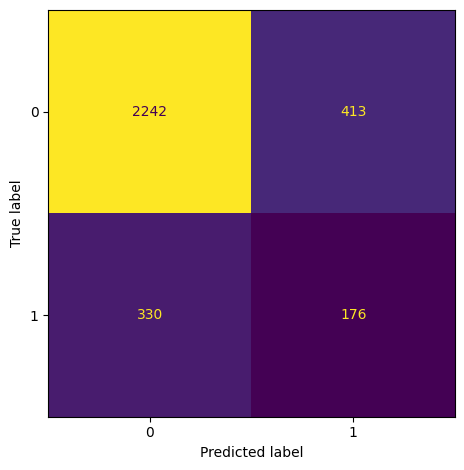

In [ ]:
print(classification_report(y19_test,y19_pred,digits=4))

ConfusionMatrixDisplay.from_predictions(
    y19_test, y19_pred, display_labels=[0,1], colorbar=False
    )
plt.tight_layout()
plt.show()


Fico es el atributo que mas modifica y que mejora mas el recall

In [ ]:
x19=x.drop('int.rate',axis=1)
x19=x19.drop('installment',axis=1)
x19=x19.drop('log.annual.inc',axis=1)
x19=x19.drop('dti',axis=1)
x19=x19.drop('days.with.cr.line',axis=1)
x19=x19.drop('revol.bal',axis=1)
x19=x19.drop('revol.util',axis=1)
x19=x19.drop('inq.last.6mths',axis=1)
x19=x19.drop('delinq.2yrs',axis=1)
x19=x19.drop('pub.rec',axis=1)
x19=x19.drop('fico',axis=1)

x19_train,x19_test,y19_train,y19_test=train_test_split(x19,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x19_train,y19_train)
y19_pred=model.predict(x19_test)

accuracy19=accuracy_score(y19_test,y19_pred)
rec19=recall_score(y19_test,y19_pred,pos_label=1)
prec19=precision_score(y19_test,y19_pred,pos_label=1)
f119=f1_score(y19_test,y19_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('prueba anterior  ',accuracy20, rec20, prec20, f120)
print('esta prueba      ',accuracy19, rec19, prec19, f119)


col.eliminated    accuracy recall precision f1 score
prueba anterior   0.7649478013286934 0.34782608695652173 0.298811544991511 0.7719899648969867
esta prueba       0.7874090477696931 0.20355731225296442 0.2768817204301075 0.7738026596606131


Observar como al eliminar 'fico' recall se reduce de 0.34 a 0.20 (disminuye 0.14)


## Resumen:  me quedo solo con 'credit.policy', 'purpose' y 'fico'



---



e) Repetir el analisis anterior incluyendo las columnas binarias derivadas del atributo purpose original.

In [ ]:
#Veo 1 por 1 cada columna de purpuse

x21=x20.drop('purpose_all_other',axis=1)
x21_train,x21_test,y21_train,y21_test=train_test_split(x21,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x21_train,y21_train)
y21_pred=model.predict(x21_test)


accuracy1=accuracy_score(y21_test,y21_pred)
rec1=recall_score(y21_test,y21_pred,pos_label=1)
prec1=precision_score(y21_test,y21_pred,pos_label=1)
f1=f1_score(y21_test,y21_pred,average='weighted')

In [ ]:
x21=x20.drop('purpose_credit_card',axis=1)
x21_train,x21_test,y21_train,y21_test=train_test_split(x21,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x21_train,y21_train)
y21_pred=model.predict(x21_test)


accuracy2=accuracy_score(y21_test,y21_pred)
rec2=recall_score(y21_test,y21_pred,pos_label=1)
prec2=precision_score(y21_test,y21_pred,pos_label=1)
f2=f1_score(y21_test,y21_pred,average='weighted')


In [ ]:
x21=x20.drop('purpose_debt_consolidation',axis=1)
x21_train,x21_test,y21_train,y21_test=train_test_split(x21,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x21_train,y21_train)
y21_pred=model.predict(x21_test)


accuracy3=accuracy_score(y21_test,y21_pred)
rec3=recall_score(y21_test,y21_pred,pos_label=1)
prec3=precision_score(y21_test,y21_pred,pos_label=1)
f3=f1_score(y21_test,y21_pred,average='weighted')


Este no se modifica, no es muy importante

In [ ]:
x21=x20.drop('purpose_educational',axis=1)
x21_train,x21_test,y21_train,y21_test=train_test_split(x21,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x21_train,y21_train)
y21_pred=model.predict(x21_test)


accuracy4=accuracy_score(y21_test,y21_pred)
rec4=recall_score(y21_test,y21_pred,pos_label=1)
prec4=precision_score(y21_test,y21_pred,pos_label=1)
f4=f1_score(y21_test,y21_pred,average='weighted')


col.eliminated      accuracy           recall              precision         f1 score
purpose             0.7649478013286934 0.34782608695652173 0.298811544991511 0.7719899648969867
debt_consolidation  0.7662132236633976 0.30039525691699603 0.28305400372439476 0.7690010879068232


Este no se modifica mucho, no es muy importante

In [ ]:
x21=x20.drop('purpose_home_improvement',axis=1)
x21_train,x21_test,y21_train,y21_test=train_test_split(x21,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x21_train,y21_train)
y21_pred=model.predict(x21_test)


accuracy5=accuracy_score(y21_test,y21_pred)
rec5=recall_score(y21_test,y21_pred,pos_label=1)
prec5=precision_score(y21_test,y21_pred,pos_label=1)
f5=f1_score(y21_test,y21_pred,average='weighted')


col.eliminated      accuracy           recall              precision         f1 score
purpose             0.7649478013286934 0.34782608695652173 0.298811544991511 0.7719899648969867
home_improvement    0.7662132236633976 0.30039525691699603 0.28305400372439476 0.7690010879068232


No cambia mucho

In [ ]:
x21=x20.drop('purpose_major_purchase',axis=1)
x21_train,x21_test,y21_train,y21_test=train_test_split(x21,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x21_train,y21_train)
y21_pred=model.predict(x21_test)


accuracy6=accuracy_score(y21_test,y21_pred)
rec6=recall_score(y21_test,y21_pred,pos_label=1)
prec6=precision_score(y21_test,y21_pred,pos_label=1)
f6=f1_score(y21_test,y21_pred,average='weighted')

col.eliminated      accuracy           recall              precision         f1 score
purpose             0.7649478013286934 0.34782608695652173 0.298811544991511 0.7719899648969867
major_purchase      0.7662132236633976 0.30039525691699603 0.28305400372439476 0.7690010879068232


In [ ]:
x21=x20.drop('purpose_small_business',axis=1)
x21_train,x21_test,y21_train,y21_test=train_test_split(x21,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x21_train,y21_train)
y21_pred=model.predict(x21_test)


accuracy7=accuracy_score(y21_test,y21_pred)
rec7=recall_score(y21_test,y21_pred,pos_label=1)
prec7=precision_score(y21_test,y21_pred,pos_label=1)
f7=f1_score(y21_test,y21_pred,average='weighted')

In [ ]:
pur=pd.DataFrame({
    "col.eliminated": ["purpose","all_others","credit_card","debt_consolidation","educational","home_improvement ","major_purchase","small_business"],
    "accuracy": [accuracy20,accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7],
    "recall": [rec20,rec1,rec2,rec3,rec4,rec5,rec6,rec7],
    "precision": [prec20,prec1,prec2,prec3,prec4,prec5,prec6,prec7],
    "f1_score": [f120,f1,f2,f3,f4,f5,f6,f7]
})

pur

,col.eliminated,accuracy,recall,precision,f1_score
0,purpose,0.764948,0.347826,0.298812,0.771990
1,all_others,0.764631,0.343874,0.296928,0.771453
2,credit_card,0.793420,0.225296,0.304000,0.780548
3,debt_consolidation,0.764948,0.347826,0.298812,0.771990
4,educational,0.768744,0.343874,0.303665,0.774446
5,home_improvement,0.757988,0.355731,0.290792,0.767511
6,major_purchase,0.798481,0.191700,0.298462,0.779856
7,small_business,0.766213,0.300395,0.283054,0.769001


La mayoria no influyen mucho, recall disminuye para:

*  'small_business' de 0.35 a 0.3(disminuye 0.05). Sigue cumpliendo la condicion de la consigna de me mejorar 'none' en 0.2
*  'credit_card' de 0.35 a 0.22 (disminuye 0.13). Sigue cumpliendo la condicion de la consigna de me mejorar 'none' en 0.2
*  'major_purchase' de 0.35 a 0.19 (disminuye 0.16). No cumple la condicion de la consigna de me mejorar 'none' en 0.2




Ahora toca como queda el modelo eliminando las columnas que no afectan

In [ ]:
x22=x20.drop('purpose_all_other',axis=1)
x22=x22.drop('purpose_debt_consolidation',axis=1)
x22=x22.drop('purpose_educational',axis=1)
x22=x22.drop('purpose_home_improvement',axis=1)
x22=x22.drop('purpose_small_business',axis=1)
x22=x22.drop('purpose_credit_card',axis=1)

x22_train,x22_test,y22_train,y22_test=train_test_split(x22,y,test_size=test_fraction, stratify=y,random_state=125)

#Entreno y predigo
model.fit(x22_train,y22_train)
y22_pred=model.predict(x22_test)

accuracy22=accuracy_score(y22_test,y22_pred)
rec22=recall_score(y22_test,y22_pred,pos_label=1)
prec22=precision_score(y22_test,y22_pred,pos_label=1)
f122=f1_score(y22_test,y22_pred,average='weighted')

print('col.eliminated   ','accuracy', 'recall', 'precision','f1 score' )
print('none             ',accuracy0, rec0, prec0, f10)
print('version anterior ',accuracy20, rec20, prec20, f120)
print('esta version     ',accuracy22, rec22, prec22, f122)

col.eliminated    accuracy recall precision f1 score
none              0.8187282505536223 0.07905138339920949 0.272108843537415 0.7746390251749721
version anterior  0.7649478013286934 0.34782608695652173 0.298811544991511 0.7719899648969867
esta version      0.78044922492882 0.2845849802371542 0.3025210084033613 0.7777123136786764


              precision    recall  f1-score   support

           0     0.8645    0.8798    0.8721      2655
           1     0.3050    0.2767    0.2902       506

    accuracy                         0.7833      3161
   macro avg     0.5848    0.5783    0.5811      3161
weighted avg     0.7750    0.7833    0.7790      3161



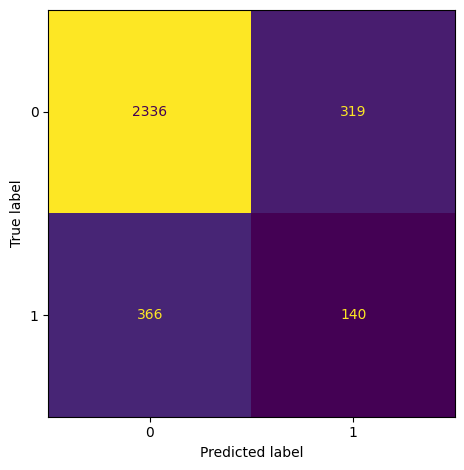

In [ ]:
print(classification_report(y22_test,y22_pred,digits=4))

ConfusionMatrixDisplay.from_predictions(
    y22_test, y22_pred, display_labels=[0,1], colorbar=False
    )
plt.tight_layout()
plt.show()

## Resumen:  En adiccion a los atributos de 'credit.policy' y 'fico' del inciso anterior, me quedo de purpose solo con 'major_purchase'. Esto mejora en 0.2 el modelo con respecto a usar todos los atributos (Lo que pedia la consigna)



---

